In [1]:
pwd

'/Users/top/Desktop/Job/taxi_analysis'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
import json

# Import Data

In [3]:
df = pd.read_csv("yellow_tripdata_2021-01_raw_updated.csv")

/Users/top/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# EDA

Check Duplicate row

In [4]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 16)


Check Null

In [5]:
print(df.isnull().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          98352
trip_distance                0
RatecodeID               98352
store_and_fwd_flag       98352
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
tripId                       0
dtype: int64


In [6]:
df = df.dropna()
df.count()

VendorID                 1271413
tpep_pickup_datetime     1271413
tpep_dropoff_datetime    1271413
passenger_count          1271413
trip_distance            1271413
RatecodeID               1271413
store_and_fwd_flag       1271413
PULocationID             1271413
DOLocationID             1271413
payment_type             1271413
fare_amount              1271413
extra                    1271413
mta_tax                  1271413
tip_amount               1271413
tolls_amount             1271413
tripId                   1271413
dtype: int64

Check data type

In [7]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance             object
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
tripId                     int64
dtype: object

In [8]:
df['trip_distance'] = df['trip_distance'].apply(lambda x: x.replace('km', ''))


In [9]:
df['VendorID'] = df['VendorID'].astype('int')
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['passenger_count'] = df['passenger_count'].astype('int')
df['trip_distance'] = pd.to_numeric(df['trip_distance'], errors='coerce')  # Coerce errors in case of non-numeric values
df['RatecodeID'] = df['RatecodeID'].astype('int')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')
df['payment_type'] = df['payment_type'].astype('int')

In [10]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag             category
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
tripId                            int64
dtype: object

# Detect anomalies

In [11]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,tripId
count,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06
mean,1.676925e+00,1.411508e+00,2.695507e+00,1.035081e+00,1.663164e+02,1.635025e+02,1.280521e+00,1.101425e+01,9.828323e-01,4.928536e-01,1.939242e+00,1.786589e-01,5.504145e+11
std,4.676513e-01,1.059833e+00,1.014488e+02,5.994840e-01,6.651732e+01,7.139416e+01,4.916921e-01,1.213470e+01,1.223763e+00,7.809472e-02,2.653374e+00,1.534606e+00,2.597369e+11
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,1.000005e+11
25%,1.000000e+00,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.256626e+11
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,5.504007e+11
75%,2.000000e+00,1.000000e+00,2.790000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.200000e+01,2.500000e+00,5.000000e-01,2.700000e+00,0.000000e+00,7.755865e+11
max,2.000000e+00,8.000000e+00,1.143282e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.960500e+03,7.000000e+00,5.000000e-01,1.140440e+03,8.117500e+02,9.999999e+11


Drop negative values (not make sense)

In [12]:
df = df.drop(df[df['fare_amount']<0].index)
df = df.drop(df[df['extra']<0].index)
df = df.drop(df[df['mta_tax']<0].index)
df = df.drop(df[df['tip_amount']<0].index)
df = df.drop(df[df['tolls_amount']<0].index)

Dealing with datetime

In [13]:
df = df.drop(df[df['tpep_pickup_datetime'].dt.year != 2021].index)
df = df.drop(df[df['tpep_dropoff_datetime'].dt.year != 2021].index)
df = df.drop(df[df['tpep_pickup_datetime'].dt.month != 1].index)
df = df.drop(df[df['tpep_dropoff_datetime'].dt.month != 1].index)
df = df.drop(df[df['tpep_pickup_datetime'] > df['tpep_dropoff_datetime']].index)

passenger_count

<AxesSubplot:xlabel='passenger_count'>

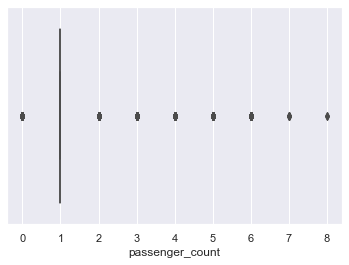

In [14]:
sns.boxplot(x=df['passenger_count'])

In [15]:
df[df['passenger_count']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,tripId
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0,10.6,1,N,138,132,1,29.0,0.5,0.5,6.05,0.0,355132875433
22,1,2021-01-01 00:16:27,2021-01-01 00:25:36,0,2.2,1,N,249,137,3,9.0,3.0,0.5,0.00,0.0,808421392489
23,1,2021-01-01 00:37:59,2021-01-01 01:01:37,0,3.6,1,N,107,163,1,17.0,3.0,0.5,10.00,0.0,801139501570
107,1,2021-01-01 00:27:44,2021-01-01 00:32:04,0,1.2,1,N,137,229,1,5.5,3.0,0.5,1.86,0.0,811631440335
127,1,2021-01-01 00:45:19,2021-01-01 00:46:51,0,0.5,1,N,229,140,2,4.0,3.0,0.5,0.00,0.0,975818162677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270916,1,2021-01-31 22:19:43,2021-01-31 22:50:44,0,11.6,1,N,132,62,2,35.5,0.5,0.5,0.00,0.0,111290176555
1270997,1,2021-01-31 22:14:08,2021-01-31 22:18:38,0,0.7,1,N,230,246,1,5.0,3.0,0.5,2.00,0.0,414199413298
1271221,1,2021-01-31 23:14:13,2021-01-31 23:24:20,0,2.2,1,N,48,239,1,9.5,3.0,0.5,1.50,0.0,920210796864
1271223,1,2021-01-31 23:25:14,2021-01-31 23:48:06,0,6.8,1,N,148,151,1,22.5,3.0,0.5,6.55,0.0,273828239100


In [16]:
df = df.drop(df[df['passenger_count'] == 0].index) #2% of whole data

trip_distance

<AxesSubplot:xlabel='trip_distance'>

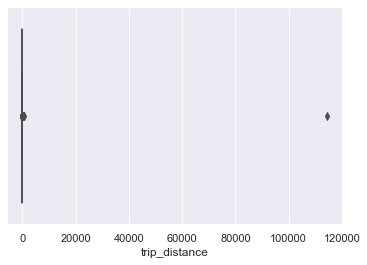

In [17]:
sns.boxplot(x=df['trip_distance'])

In [18]:
df = df.drop(df[df['trip_distance']>20000].index)


<AxesSubplot:xlabel='trip_distance'>

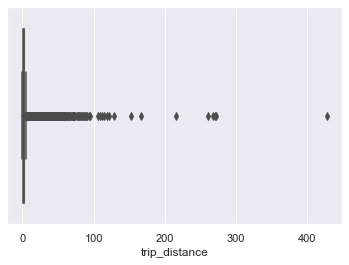

In [19]:
sns.boxplot(x=df['trip_distance'])

In [20]:
df = df.drop(df[df['trip_distance']>100].index) #0.0000..% of whole data


<AxesSubplot:xlabel='mta_tax'>

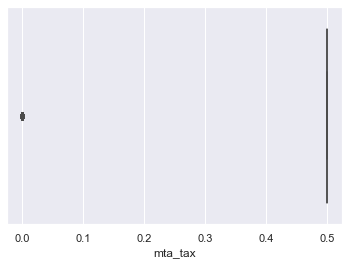

In [21]:
sns.boxplot(x=df['mta_tax'])

<AxesSubplot:xlabel='tip_amount'>

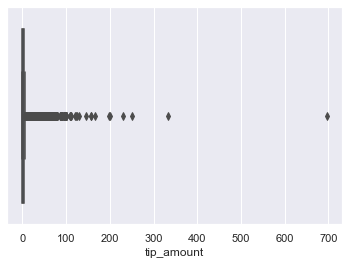

In [22]:
sns.boxplot(x=df['tip_amount'])

In [23]:
df = df.drop(df[df['tip_amount']>200].index) #0.0000..% of whole data

<AxesSubplot:xlabel='tolls_amount'>

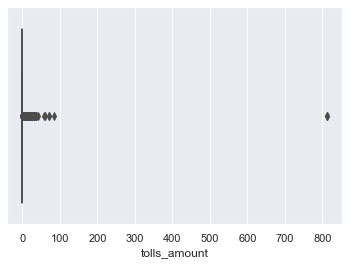

In [24]:
sns.boxplot(x=df['tolls_amount'])

In [25]:
df = df.drop(df[df['tolls_amount']>100].index)

<AxesSubplot:xlabel='tolls_amount'>

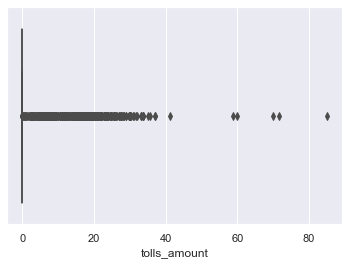

In [26]:
sns.boxplot(x=df['tolls_amount'])

<AxesSubplot:xlabel='fare_amount'>

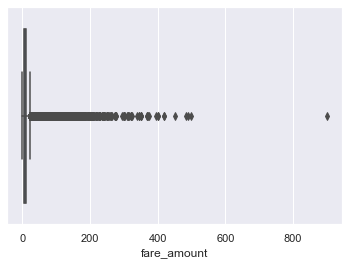

In [27]:
sns.boxplot(x=df['fare_amount'])

In [28]:

df = df.drop(df[df['fare_amount']>2000].index)

<AxesSubplot:xlabel='fare_amount'>

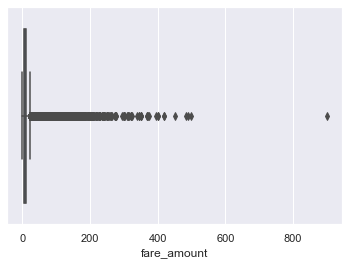

In [29]:
sns.boxplot(x=df['fare_amount'])

In [30]:
df = df.drop(df[df['fare_amount']>500].index)

# Join json

In [31]:
data = json.load(open("surcharge_data.json", "r"))
json = pd.DataFrame.from_dict(data, orient="index")
# df = pd.read_json("surcharge_data.json")

In [32]:
json = json.rename_axis('tripId').reset_index()
json

,tripId,improvement_surcharge,congestion_surcharge
0,559893529209,0.3,2.5
1,993405808080,0.3,0.0
2,267031741304,0.3,0.0
3,355132875433,0.3,0.0
4,603494714228,0.3,2.5
...,...,...,...
1369760,204125243754,0.3,0.0
1369761,511527970247,0.3,0.0
1369762,795487851532,0.3,0.0
1369763,550977006601,0.3,0.0


In [33]:
json.dtypes

tripId                    object
improvement_surcharge    float64
congestion_surcharge     float64
dtype: object

In [34]:
json['tripId'] = json['tripId'].astype('int')


In [35]:
joined = df.merge(json, how='left', on='tripId')

In [36]:
joined

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,tripId,improvement_surcharge,congestion_surcharge
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,1,N,142,43,2,8.0,3.0,0.5,0.00,0.00,559893529209,0.3,2.5
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,1,N,238,151,2,3.0,0.5,0.5,0.00,0.00,993405808080,0.3,0.0
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,1,N,132,165,1,42.0,0.5,0.5,8.65,0.00,267031741304,0.3,0.0
3,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,1,N,68,33,1,16.5,0.5,0.5,4.06,0.00,603494714228,0.3,2.5
4,1,2021-01-01 00:16:29,2021-01-01 00:24:30,1,1.60,1,N,224,68,1,8.0,3.0,0.5,2.35,0.00,796431455521,0.3,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237864,2,2021-01-31 23:39:26,2021-01-31 23:54:36,3,6.85,1,N,137,42,2,20.5,0.5,0.5,0.00,0.00,879791232973,0.3,2.5
1237865,2,2021-01-31 23:07:54,2021-01-31 23:19:42,1,3.81,1,N,113,141,2,12.5,0.5,0.5,0.00,0.00,823977871617,0.3,2.5
1237866,2,2021-01-31 23:30:45,2021-01-31 23:35:13,1,1.32,1,N,233,237,2,6.0,0.5,0.5,0.00,0.00,707600771239,0.3,2.5
1237867,2,2021-01-31 23:09:52,2021-01-31 23:51:56,2,10.56,1,N,56,68,1,37.5,0.5,0.5,0.00,6.12,671711024112,0.3,0.0


In [37]:
joined.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
tripId                   0
improvement_surcharge    0
congestion_surcharge     0
dtype: int64

In [38]:
joined.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag             category
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
tripId                            int64
improvement_surcharge           float64
congestion_surcharge            float64
dtype: object

# Add columns for analysis

In [39]:
joined['tip_ratio'] = joined['tip_amount']/joined['fare_amount']
joined['Hour'] = (joined['tpep_pickup_datetime']).dt.hour
joined['DoW'] = (joined['tpep_pickup_datetime']).dt.day_name()

# Join dimension table

In [40]:
vendor_lst = [[1, 'Creative Mobile Technologies, LLC'],
                    [2, 'VeriFone Inc.']] 

# creating df object with columns specified    
dimVendor = pd.DataFrame(vendor_lst, columns =['VendorID', 'vendor_name']) 

In [41]:
joined2 = joined.merge(dimVendor, how='left', on='VendorID')

In [42]:
ratecode_lst = [[1, 'Standard rate'],
                [2,'JFK'],
                [3,'Newark'],
                [4,'Nassau or Westchester'],
                [5,'Negotiated fare'],
                [6,'Group ride']] 

# creating df object with columns specified    
dimRatecode = pd.DataFrame(ratecode_lst, columns =['RatecodeID', 'RateCode']) 

In [43]:
joined3 = joined2.merge(dimRatecode, how='left', on='RatecodeID')

In [44]:
payment_type_lst = [[1, 'Credit card'],
                    [2, 'Cash'],
                    [3, 'No charge'],
                    [4, 'Dispute'],
                    [5, 'Unknown'],
                    [6, 'Voided trip']] 

# creating df object with columns specified    
dimPayment_type = pd.DataFrame(payment_type_lst, columns =['payment_id', 'payment_type']) 


In [45]:
final = joined3.merge(dimPayment_type, how='left', left_on='payment_type', right_on='payment_id')
final = final.drop(['payment_id','payment_type_x'], axis =1)
final = final.rename(columns={"payment_type_y": "payment_type"})

In [46]:
final

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,tolls_amount,tripId,improvement_surcharge,congestion_surcharge,tip_ratio,Hour,DoW,vendor_name,RateCode,payment_type
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,1,N,142,43,8.0,...,0.00,559893529209,0.3,2.5,0.000000,0,Friday,"Creative Mobile Technologies, LLC",Standard rate,Cash
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,0.20,1,N,238,151,3.0,...,0.00,993405808080,0.3,0.0,0.000000,0,Friday,"Creative Mobile Technologies, LLC",Standard rate,Cash
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,1,N,132,165,42.0,...,0.00,267031741304,0.3,0.0,0.205952,0,Friday,"Creative Mobile Technologies, LLC",Standard rate,Credit card
3,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,1,N,68,33,16.5,...,0.00,603494714228,0.3,2.5,0.246061,0,Friday,VeriFone Inc.,Standard rate,Credit card
4,1,2021-01-01 00:16:29,2021-01-01 00:24:30,1,1.60,1,N,224,68,8.0,...,0.00,796431455521,0.3,2.5,0.293750,0,Friday,"Creative Mobile Technologies, LLC",Standard rate,Credit card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237864,2,2021-01-31 23:39:26,2021-01-31 23:54:36,3,6.85,1,N,137,42,20.5,...,0.00,879791232973,0.3,2.5,0.000000,23,Sunday,VeriFone Inc.,Standard rate,Cash
1237865,2,2021-01-31 23:07:54,2021-01-31 23:19:42,1,3.81,1,N,113,141,12.5,...,0.00,823977871617,0.3,2.5,0.000000,23,Sunday,VeriFone Inc.,Standard rate,Cash
1237866,2,2021-01-31 23:30:45,2021-01-31 23:35:13,1,1.32,1,N,233,237,6.0,...,0.00,707600771239,0.3,2.5,0.000000,23,Sunday,VeriFone Inc.,Standard rate,Cash
1237867,2,2021-01-31 23:09:52,2021-01-31 23:51:56,2,10.56,1,N,56,68,37.5,...,6.12,671711024112,0.3,0.0,0.000000,23,Sunday,VeriFone Inc.,Standard rate,Credit card


# Join Spatial_taxi_zone

In [47]:
taxi_zone = pd.read_csv('taxi_zones.csv')

In [48]:
taxi_zone.dtypes

OBJECTID        int64
Shape_Leng    float64
the_geom       object
Shape_Area    float64
zone           object
LocationID      int64
borough        object
dtype: object

In [49]:
final_with_zone = final.merge(taxi_zone, how='left', left_on='PULocationID', right_on='LocationID')
final_with_zone = final_with_zone.drop(final_with_zone[final_with_zone['RateCode'].isnull()].index)

In [50]:
final_with_zone.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
PULocationID                0
DOLocationID                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
tripId                      0
improvement_surcharge       0
congestion_surcharge        0
tip_ratio                 578
Hour                        0
DoW                         0
vendor_name                 0
RateCode                    0
payment_type                0
OBJECTID                 9406
Shape_Leng               9406
the_geom                 9406
Shape_Area               9406
zone                     9406
LocationID               9406
borough                  9406
dtype: int64

In [51]:
grouped_data = final_with_zone.groupby(['zone','the_geom', 'DoW', 'Hour']).agg({'tripId':'count', 
                                                                                 'tip_amount':['mean','sum'], 
                                                                                 'trip_distance':'mean', 
                                                                                 'fare_amount': ['mean','sum']})

In [52]:
final_with_zone = final_with_zone.drop(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'LocationID', 'the_geom'], axis=1)


# Export

In [53]:
# final.to_csv("cleaned_yellow_tripdata_2021-01_v2.csv")

In [54]:
final_with_zone.to_csv("cleaned_yellow_tripdata_2021-01_v4.csv")

In [55]:
grouped_data.to_csv("aggzone_v2.csv")

# Analyse tip

In [56]:
Q1 = final['tip_amount'].quantile(0.25)
Q3 = final['tip_amount'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print(IQR)
print(low_lim)
print(up_lim)

2.7
-4.050000000000001
6.750000000000001


In [57]:
credit_card_trx = final[final['payment_type']=='Credit card']


In [58]:
credit_card_trx

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,tolls_amount,tripId,improvement_surcharge,congestion_surcharge,tip_ratio,Hour,DoW,vendor_name,RateCode,payment_type
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,1,N,132,165,42.0,...,0.00,267031741304,0.3,0.0,0.205952,0,Friday,"Creative Mobile Technologies, LLC",Standard rate,Credit card
3,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,1,N,68,33,16.5,...,0.00,603494714228,0.3,2.5,0.246061,0,Friday,VeriFone Inc.,Standard rate,Credit card
4,1,2021-01-01 00:16:29,2021-01-01 00:24:30,1,1.60,1,N,224,68,8.0,...,0.00,796431455521,0.3,2.5,0.293750,0,Friday,"Creative Mobile Technologies, LLC",Standard rate,Credit card
8,1,2021-01-01 00:26:12,2021-01-01 00:39:46,2,2.70,1,N,263,142,12.0,...,0.00,762316622020,0.3,2.5,0.262500,0,Friday,"Creative Mobile Technologies, LLC",Standard rate,Credit card
9,2,2021-01-01 00:15:52,2021-01-01 00:38:07,3,6.11,1,N,164,255,20.5,...,0.00,410196195773,0.3,2.5,0.000000,0,Friday,VeriFone Inc.,Standard rate,Credit card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237858,2,2021-01-31 23:25:13,2021-01-31 23:37:16,2,2.87,1,N,230,75,11.0,...,0.00,540317926189,0.3,2.5,0.018182,23,Sunday,VeriFone Inc.,Standard rate,Credit card
1237859,2,2021-01-31 23:36:30,2021-01-31 23:51:58,2,8.74,1,N,132,131,25.0,...,0.00,574343975705,0.3,0.0,0.000000,23,Sunday,VeriFone Inc.,Standard rate,Credit card
1237863,2,2021-01-31 23:12:06,2021-01-31 23:12:13,1,0.00,5,N,265,265,200.0,...,0.00,570663266304,0.3,0.0,0.050000,23,Sunday,VeriFone Inc.,Negotiated fare,Credit card
1237867,2,2021-01-31 23:09:52,2021-01-31 23:51:56,2,10.56,1,N,56,68,37.5,...,6.12,671711024112,0.3,0.0,0.000000,23,Sunday,VeriFone Inc.,Standard rate,Credit card


<AxesSubplot:xlabel='tip_amount'>

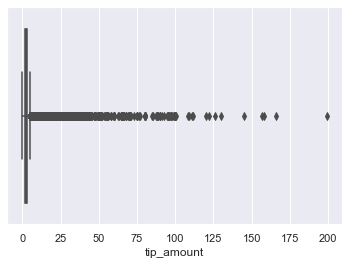

In [59]:
sns.boxplot(x=credit_card_trx['tip_amount'])

In [60]:
tip_lim = credit_card_trx[credit_card_trx['tip_amount']<=6.75]
tip_lim

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,tolls_amount,tripId,improvement_surcharge,congestion_surcharge,tip_ratio,Hour,DoW,vendor_name,RateCode,payment_type
3,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,1,N,68,33,16.5,...,0.00,603494714228,0.3,2.5,0.246061,0,Friday,VeriFone Inc.,Standard rate,Credit card
4,1,2021-01-01 00:16:29,2021-01-01 00:24:30,1,1.60,1,N,224,68,8.0,...,0.00,796431455521,0.3,2.5,0.293750,0,Friday,"Creative Mobile Technologies, LLC",Standard rate,Credit card
8,1,2021-01-01 00:26:12,2021-01-01 00:39:46,2,2.70,1,N,263,142,12.0,...,0.00,762316622020,0.3,2.5,0.262500,0,Friday,"Creative Mobile Technologies, LLC",Standard rate,Credit card
9,2,2021-01-01 00:15:52,2021-01-01 00:38:07,3,6.11,1,N,164,255,20.5,...,0.00,410196195773,0.3,2.5,0.000000,0,Friday,VeriFone Inc.,Standard rate,Credit card
10,2,2021-01-01 00:46:36,2021-01-01 00:53:45,2,1.21,1,N,255,80,7.0,...,0.00,102898637308,0.3,0.0,0.355714,0,Friday,VeriFone Inc.,Standard rate,Credit card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237857,2,2021-01-31 23:11:27,2021-01-31 23:33:50,1,5.52,1,N,163,256,19.5,...,0.00,831175247345,0.3,2.5,0.238974,23,Sunday,VeriFone Inc.,Standard rate,Credit card
1237858,2,2021-01-31 23:25:13,2021-01-31 23:37:16,2,2.87,1,N,230,75,11.0,...,0.00,540317926189,0.3,2.5,0.018182,23,Sunday,VeriFone Inc.,Standard rate,Credit card
1237859,2,2021-01-31 23:36:30,2021-01-31 23:51:58,2,8.74,1,N,132,131,25.0,...,0.00,574343975705,0.3,0.0,0.000000,23,Sunday,VeriFone Inc.,Standard rate,Credit card
1237867,2,2021-01-31 23:09:52,2021-01-31 23:51:56,2,10.56,1,N,56,68,37.5,...,6.12,671711024112,0.3,0.0,0.000000,23,Sunday,VeriFone Inc.,Standard rate,Credit card


<AxesSubplot:xlabel='tip_amount', ylabel='fare_amount'>

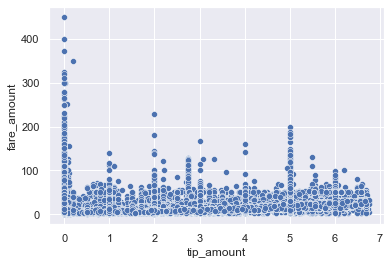

In [61]:
sns.scatterplot(data=tip_lim, x="tip_amount", y="fare_amount")

# Congestion Surcharge Analysis

/Users/top/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_distance', ylabel='congestion_surcharge'>

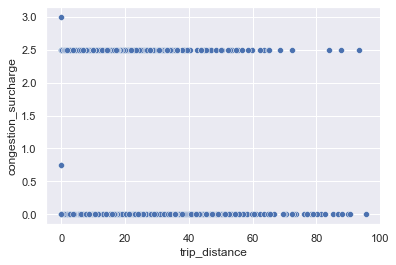

In [62]:
sns.scatterplot(final['trip_distance'], final['congestion_surcharge'])

In [63]:
final.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag             category
PULocationID                      int64
DOLocationID                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
tripId                            int64
improvement_surcharge           float64
congestion_surcharge            float64
tip_ratio                       float64
Hour                              int64
DoW                              object
vendor_name                      object
RateCode                         object
payment_type                     object
dtype: object

In [64]:
final['trip_time'] = final['tpep_dropoff_datetime'] - final['tpep_pickup_datetime']


In [65]:
final['trip_time(min)'] = final['trip_time'].dt.seconds / 60


In [66]:
final['trip_velocity'] = final['trip_distance'] / final['trip_time'].astype('int')


/Users/top/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


/Users/top/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_time(min)', ylabel='congestion_surcharge'>

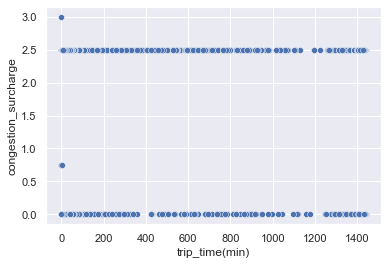

In [67]:
sns.scatterplot(final['trip_time(min)'], final['congestion_surcharge'])

/Users/top/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='trip_velocity', ylabel='congestion_surcharge'>

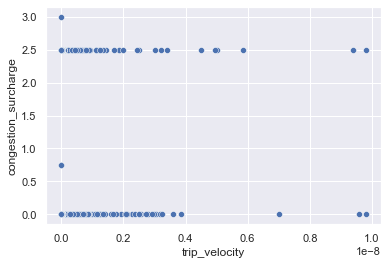

In [68]:
sns.scatterplot(final['trip_velocity'], final['congestion_surcharge'])